In [1]:
import numpy as np
import pandas as pd
#load the data from link 
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [2]:
X_test.shape

(411, 10)

In [3]:
#lets check the first 5 rows of data
X_train.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


In [4]:
#check for the data type and missing values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


In [5]:
#check for duplicate entries
X_train.duplicated().sum()

9

In [6]:
# lests drop the duplicate data 
X_train.drop_duplicates(inplace=True) #inplace true is to drop duplicate data permenently

In [7]:
#check the result again
X_train.duplicated().sum()

0

In [8]:
# lets check for the bad data. by checking the value count
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        print(X_train[column].value_counts())
        print("*****************************")

model
mercedes-benz    401
nissan           349
hyundai          347
kia              283
toyota           253
Name: count, dtype: int64
*****************************
motor_type
petrol            1412
gas                165
petrol and gas      53
diesel               2
hybrid               1
Name: count, dtype: int64
*****************************
running
300000  km      19
70000  miles    18
120000  km      16
65000  miles    15
60000  miles    15
                ..
201000  km       1
8800  km         1
101  miles       1
96122  km        1
68900  miles     1
Name: count, Length: 643, dtype: int64
*****************************
wheel
left    1633
Name: count, dtype: int64
*****************************
color
black      537
white      406
silver     220
gray       188
blue       141
red         47
other       30
cherry      20
green       10
brown       10
golden       6
orange       5
beige        5
clove        3
purple       2
skyblue      2
pink         1
Name: count, dtype: int64
***

In [9]:
# as we see in wheel column only one entry i.e left. so this feature should be neet to drop for model prediction
X_train.drop('wheel', axis=1, inplace=True)

In [10]:
X_train.head()

,model,year,motor_type,running,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,black,sedan,good,2.0,26000


In [11]:
# feature running contain km and miles also.. so lets convert miles into km for stadard format
#by multiplying the number of miles by the conversion factor, which is 1.60934 (since 1 mile is approximately equal to 1.60934 kilometers). 
#create a function for that

conversion_factor = 1.60934


In [12]:
float(X_train['running'].iloc[0].split()[0])*1.60934

4828.0199999999995

In [13]:
"miles" in X_train['running'].iloc[0].lower()

False

In [14]:
"miles" in X_train['running'].iloc[2].lower()

True

In [15]:
def convert_miles_to_km(running):
    if 'miles' in running.lower():
        
        miles = float(running.split()[0])
        km = miles * conversion_factor
        return km
    else:
        return float(running.split()[0])


In [16]:
X_train['running'] = X_train['running'].apply(convert_miles_to_km)

In [17]:
X_train.head()

,model,year,motor_type,running,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000.00,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000.00,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,152887.30,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,220479.58,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000.00,black,sedan,good,2.0,26000


In [18]:
X_train.head()

,model,year,motor_type,running,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000.00,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000.00,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,152887.30,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,220479.58,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000.00,black,sedan,good,2.0,26000


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, 0 to 1641
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1633 non-null   object 
 1   year          1633 non-null   int64  
 2   motor_type    1633 non-null   object 
 3   running       1633 non-null   float64
 4   color         1633 non-null   object 
 5   type          1633 non-null   object 
 6   status        1633 non-null   object 
 7   motor_volume  1633 non-null   float64
 8   price         1633 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 127.6+ KB


In [20]:
# lets change the year dtype into object
X_train['year']= X_train['year'].astype(object)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, 0 to 1641
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1633 non-null   object 
 1   year          1633 non-null   object 
 2   motor_type    1633 non-null   object 
 3   running       1633 non-null   float64
 4   color         1633 non-null   object 
 5   type          1633 non-null   object 
 6   status        1633 non-null   object 
 7   motor_volume  1633 non-null   float64
 8   price         1633 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 127.6+ KB


In [22]:
# lets check for test data
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            411 non-null    int64  
 1   model         411 non-null    object 
 2   year          411 non-null    int64  
 3   motor_type    411 non-null    object 
 4   running       411 non-null    object 
 5   wheel         411 non-null    object 
 6   color         411 non-null    object 
 7   type          411 non-null    object 
 8   status        411 non-null    object 
 9   motor_volume  411 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 32.2+ KB


In [23]:
# as we see there is no missing values
X_test.head()

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume
0,0,kia,2020,petrol,24000 km,left,black,sedan,excellent,2.0
1,1,nissan,2017,petrol,85000 miles,left,white,suv,excellent,2.0
2,2,hyundai,2021,petrol,30000 miles,left,white,sedan,excellent,2.0
3,3,kia,2018,petrol,53000 miles,left,silver,sedan,excellent,2.0
4,4,mercedes-benz,2003,petrol,230000 km,left,black,Universal,normal,1.8


In [24]:
#remove ID and wheel column as we dont need
X_test.drop(['Id', 'wheel'], axis=1, inplace=True)

In [25]:
X_test.head()

,model,year,motor_type,running,color,type,status,motor_volume
0,kia,2020,petrol,24000 km,black,sedan,excellent,2.0
1,nissan,2017,petrol,85000 miles,white,suv,excellent,2.0
2,hyundai,2021,petrol,30000 miles,white,sedan,excellent,2.0
3,kia,2018,petrol,53000 miles,silver,sedan,excellent,2.0
4,mercedes-benz,2003,petrol,230000 km,black,Universal,normal,1.8


In [26]:
# lets convert running miles into km by unsing function that we define alredy
X_test['running']= X_test['running'].apply(convert_miles_to_km)

In [27]:
X_test.head()

,model,year,motor_type,running,color,type,status,motor_volume
0,kia,2020,petrol,24000.00,black,sedan,excellent,2.0
1,nissan,2017,petrol,136793.90,white,suv,excellent,2.0
2,hyundai,2021,petrol,48280.20,white,sedan,excellent,2.0
3,kia,2018,petrol,85295.02,silver,sedan,excellent,2.0
4,mercedes-benz,2003,petrol,230000.00,black,Universal,normal,1.8


In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         411 non-null    object 
 1   year          411 non-null    int64  
 2   motor_type    411 non-null    object 
 3   running       411 non-null    float64
 4   color         411 non-null    object 
 5   type          411 non-null    object 
 6   status        411 non-null    object 
 7   motor_volume  411 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 25.8+ KB


In [29]:
#change year dtype
X_test['year']= X_test['year'].astype(object)

In [30]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         411 non-null    object 
 1   year          411 non-null    object 
 2   motor_type    411 non-null    object 
 3   running       411 non-null    float64
 4   color         411 non-null    object 
 5   type          411 non-null    object 
 6   status        411 non-null    object 
 7   motor_volume  411 non-null    float64
dtypes: float64(2), object(6)
memory usage: 25.8+ KB


In [31]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
X_train.describe()

,running,motor_volume,price
count,1.633000e+03,1633.000000,1633.000000
mean,1.192440e+05,2.035334,15980.424985
std,9.689066e+04,0.253688,7191.552191
min,1.000000e+01,0.200000,462.000000
25%,5.632690e+04,2.000000,11950.000000
50%,9.900000e+04,2.000000,15750.000000
75%,1.609340e+05,2.000000,18500.000000
max,1.251708e+06,4.000000,87000.000000


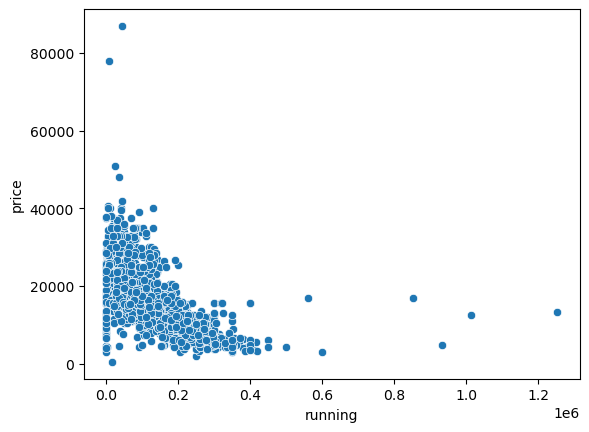

In [33]:
sns.scatterplot(x= X_train['running'], y=X_train['price'], data=X_train)
plt.show()

<Axes: >

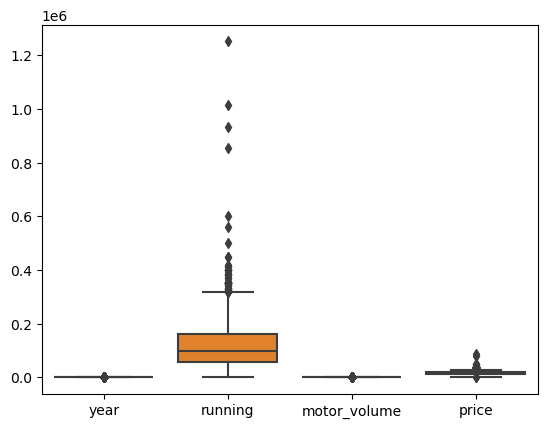

In [34]:
sns.boxplot(X_train)

<Axes: >

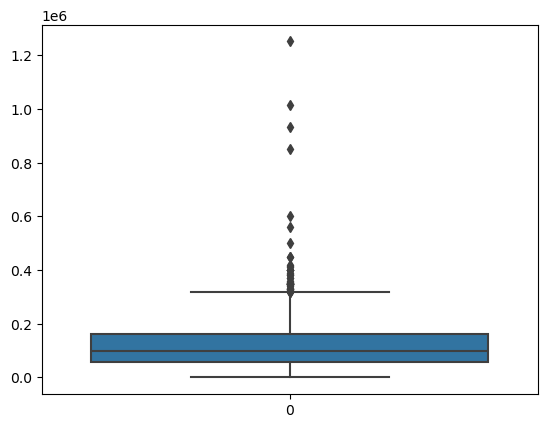

In [35]:
sns.boxplot(X_train['running'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='running', ylabel='Density'>

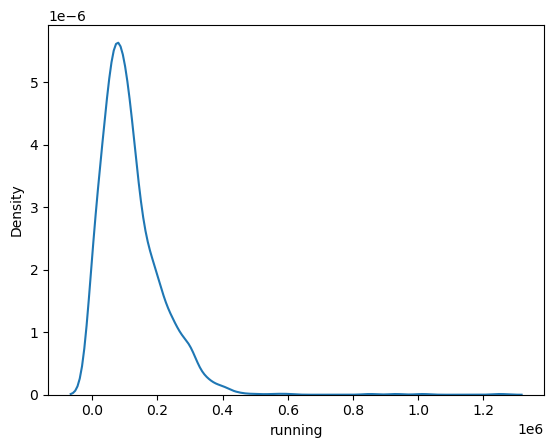

In [36]:
sns.kdeplot(X_train['running'])

In [37]:
X_train['running'].skew()

2.8443457161936516

In [38]:
# as we seen running feture is right skew and having outliers.
#so lets handle the outlier


percentile = X_train['running'].quantile([0.25, 0.75])

In [39]:
percentile

0.25     56326.9
0.75    160934.0
Name: running, dtype: float64

In [40]:
iqr = X_train['running'].quantile( 0.75)- X_train['running'].quantile(0.25)

In [41]:
iqr

104607.1

In [42]:
upper_bond = 160934.0 + 1.5 *iqr
lower_bond = 56326.9 - 1.5 * iqr

print("upper bond:-" , upper_bond, 'lower_bond:-', lower_bond)

upper bond:- 317844.65 lower_bond:- -100583.75000000003


In [43]:
# Function to replace outliers of the 'running' feature with upper limit
def replace_running_outliers_with_upper_limit(X_train, feature_name, upper_limit):
    
    # Replace outliers with the upper limit for the 'running' feature
    X_train[feature_name] = np.where(X_train[feature_name] > upper_bond, upper_limit, X_train[feature_name])
    
    return X_train

# Define the upper limit for the 'running' feature
upper_limit_running = 320000

# Replace outliers of the 'running' feature with the upper limit
X_train = replace_running_outliers_with_upper_limit(X_train, 'running', upper_limit_running)




<Axes: >

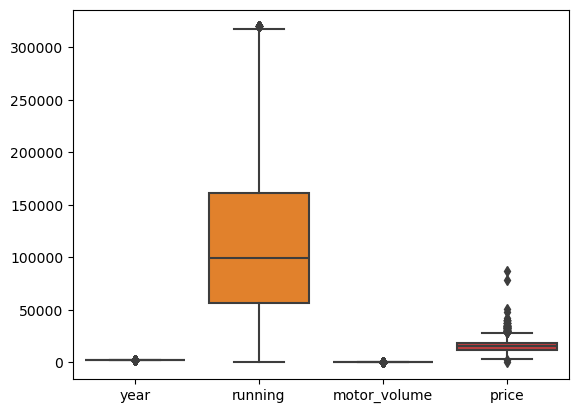

In [44]:
sns.boxplot(X_train)

<Axes: >

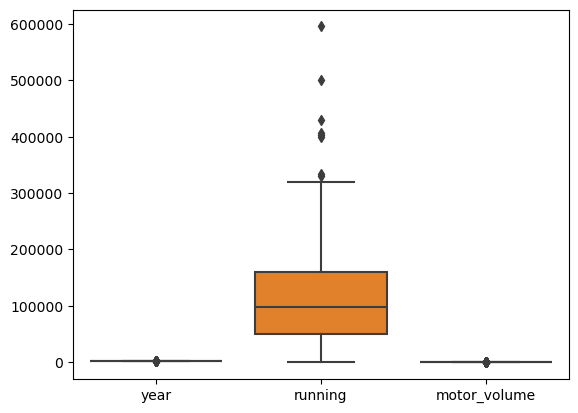

In [45]:
sns.boxplot(X_test)

In [46]:
X_train['status'].unique()

array(['excellent', 'good', 'crashed', 'normal', 'new'], dtype=object)

In [47]:
X_train['status'].nunique()

5

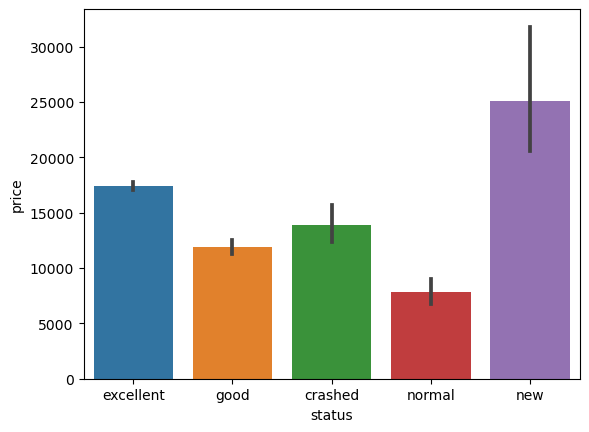

In [48]:
sns.barplot(x= X_train['status'], y=X_train['price'], data=X_train)
plt.show()

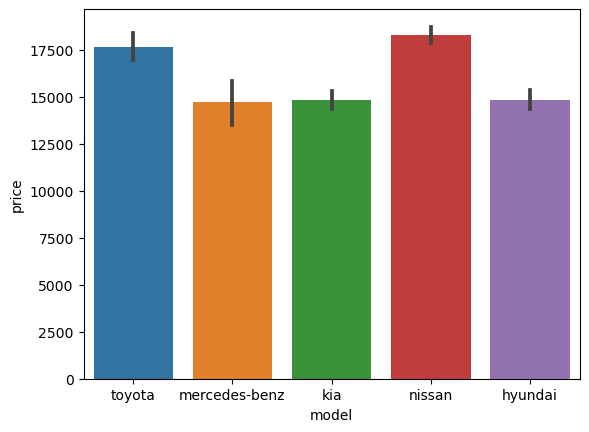

In [49]:
sns.barplot(x= X_train['model'], y=X_train['price'], data=X_train)
plt.show()

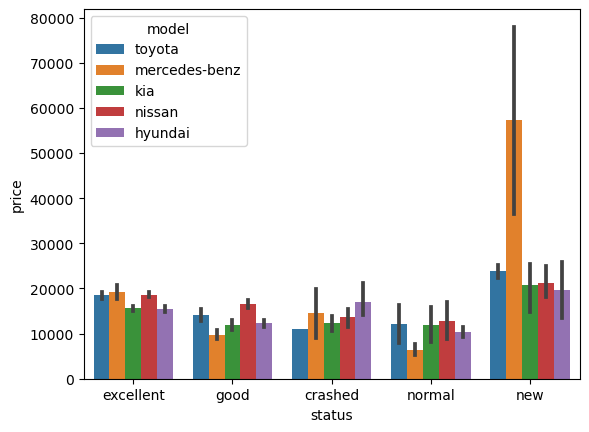

In [50]:
sns.barplot(x= X_train['status'], y=X_train['price'], data=X_train, hue=X_train['model'])
plt.show()

In [51]:
#lets split the data into dependent and independent feature
X_train_final =X_train.drop('price', axis=1)
y_train_final = X_train['price']

In [52]:
# lets convert all categorical features into numerical features
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, 0 to 1641
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1633 non-null   object 
 1   year          1633 non-null   object 
 2   motor_type    1633 non-null   object 
 3   running       1633 non-null   float64
 4   color         1633 non-null   object 
 5   type          1633 non-null   object 
 6   status        1633 non-null   object 
 7   motor_volume  1633 non-null   float64
dtypes: float64(2), object(6)
memory usage: 179.4+ KB


In [53]:
X_train_final['model'].unique()

array(['toyota', 'mercedes-benz', 'kia', 'nissan', 'hyundai'],
      dtype=object)

In [54]:
X_train_final['type'].unique()

array(['sedan', 'suv', 'Universal', 'Coupe', 'pickup', 'hatchback',
       'minivan / minibus'], dtype=object)

In [55]:
X_train_final['motor_type'].unique()

array(['petrol', 'gas', 'petrol and gas', 'diesel', 'hybrid'],
      dtype=object)

In [56]:
X_train_final.columns

Index(['model', 'year', 'motor_type', 'running', 'color', 'type', 'status',
       'motor_volume'],
      dtype='object')

In [57]:
categories = ['model', 'year', 'motor_type', 'color', 'type']

In [58]:
X_train_final.head()

,model,year,motor_type,running,color,type,status,motor_volume
0,toyota,2022,petrol,3000.00,skyblue,sedan,excellent,2.0
1,mercedes-benz,2014,petrol,132000.00,black,sedan,excellent,2.0
2,kia,2018,petrol,152887.30,other,sedan,excellent,2.0
3,mercedes-benz,2002,petrol,220479.58,golden,sedan,excellent,3.2
4,mercedes-benz,2017,petrol,130000.00,black,sedan,good,2.0


In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cat_cols = ['model', 'year', 'motor_type', 'color', 'type']

for col in cat_cols:
    X_train_final[col] = label_encoder.fit_transform(X_train_final[col].values)
    
    X_test[col] = label_encoder.transform(X_test[col])

In [60]:
X_train_final.head()

,model,year,motor_type,running,color,type,status,motor_volume
0,4,30,3,3000.00,15,5,excellent,2.0
1,2,22,3,132000.00,1,5,excellent,2.0
2,1,26,3,152887.30,10,5,excellent,2.0
3,2,10,3,220479.58,6,5,excellent,3.2
4,2,25,3,130000.00,1,5,good,2.0


In [61]:
X_test.head()

,model,year,motor_type,running,color,type,status,motor_volume
0,1,28,3,24000.00,1,5,excellent,2.0
1,3,25,3,136793.90,16,6,excellent,2.0
2,0,29,3,48280.20,16,5,excellent,2.0
3,1,26,3,85295.02,14,5,excellent,2.0
4,2,11,3,230000.00,1,1,normal,1.8


In [62]:
# for status- lets apply oridnal encoding
from sklearn.preprocessing import OrdinalEncoder


# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'status' column
X_train_final['status'] = ordinal_encoder.fit_transform(X_train_final[['status']])
X_test['status'] = ordinal_encoder.transform(X_test[['status']])

In [63]:
X_train_final.head()

,model,year,motor_type,running,color,type,status,motor_volume
0,4,30,3,3000.00,15,5,1.0,2.0
1,2,22,3,132000.00,1,5,1.0,2.0
2,1,26,3,152887.30,10,5,1.0,2.0
3,2,10,3,220479.58,6,5,1.0,3.2
4,2,25,3,130000.00,1,5,2.0,2.0


In [64]:
X_test.head()

,model,year,motor_type,running,color,type,status,motor_volume
0,1,28,3,24000.00,1,5,1.0,2.0
1,3,25,3,136793.90,16,6,1.0,2.0
2,0,29,3,48280.20,16,5,1.0,2.0
3,1,26,3,85295.02,14,5,1.0,2.0
4,2,11,3,230000.00,1,1,4.0,1.8


In [65]:
# train test split the X_train final data

from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train_final, y_train_final, test_size=0.2, random_state=30)

In [66]:
X_train_1.shape

(1306, 8)

In [67]:
y_train_1.shape

(1306,)

In [68]:
X_test_1.shape

(327, 8)

In [69]:
y_test_1.shape

(327,)

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the training and testing data
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)


In [72]:

# Define the parameter grid for each model
param_grid_linear = {}
param_grid_ridge = {'alpha': [0.1, 1, 10]}
param_grid_lasso = {'alpha': [0.1, 1, 10]}
param_grid_elasticnet = {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
param_grid_dt = {'max_depth': [None, 10, 20, 30]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}


In [73]:

# Initialize models
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
elasticnet_reg = ElasticNet()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()


In [74]:

# Initialize GridSearchCV for each model
grid_linear = GridSearchCV(linear_reg, param_grid_linear, scoring='neg_mean_squared_error', cv=5)
grid_ridge = GridSearchCV(ridge_reg, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_lasso = GridSearchCV(lasso_reg, param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
grid_elasticnet = GridSearchCV(elasticnet_reg, param_grid_elasticnet, scoring='neg_mean_squared_error', cv=5)
grid_dt = GridSearchCV(dt_reg, param_grid_dt, scoring='neg_mean_squared_error', cv=5)
grid_rf = GridSearchCV(rf_reg, param_grid_rf, scoring='neg_mean_squared_error', cv=5)


In [75]:

# Fit GridSearchCV to standardized training data for each model
grid_linear.fit(X_train_scaled, y_train_1)
grid_ridge.fit(X_train_scaled, y_train_1)
grid_lasso.fit(X_train_scaled, y_train_1)
grid_elasticnet.fit(X_train_scaled, y_train_1)
grid_dt.fit(X_train_scaled, y_train_1)
grid_rf.fit(X_train_scaled, y_train_1)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [76]:

# Get best parameters and best estimator for each model
best_params_linear = grid_linear.best_params_
best_params_ridge = grid_ridge.best_params_
best_params_lasso = grid_lasso.best_params_
best_params_elasticnet = grid_elasticnet.best_params_
best_params_dt = grid_dt.best_params_
best_params_rf = grid_rf.best_params_

best_estimator_linear = grid_linear.best_estimator_
best_estimator_ridge = grid_ridge.best_estimator_
best_estimator_lasso = grid_lasso.best_estimator_
best_estimator_elasticnet = grid_elasticnet.best_estimator_
best_estimator_dt = grid_dt.best_estimator_
best_estimator_rf = grid_rf.best_estimator_

In [77]:


# Make predictions on standardized test data using best estimator for each model
y_pred_linear = best_estimator_linear.predict(X_test_scaled)
y_pred_ridge = best_estimator_ridge.predict(X_test_scaled)
y_pred_lasso = best_estimator_lasso.predict(X_test_scaled)
y_pred_elasticnet = best_estimator_elasticnet.predict(X_test_scaled)
y_pred_dt = best_estimator_dt.predict(X_test_scaled)
y_pred_rf = best_estimator_rf.predict(X_test_scaled)

In [78]:
# Evaluate performance of each model
mse_linear = mean_squared_error(y_test_1, y_pred_linear)
r2_linear = r2_score(y_test_1, y_pred_linear)

mse_ridge = mean_squared_error(y_test_1, y_pred_ridge)
r2_ridge = r2_score(y_test_1, y_pred_ridge)

mse_lasso = mean_squared_error(y_test_1, y_pred_lasso)
r2_lasso = r2_score(y_test_1, y_pred_lasso)

mse_elasticnet = mean_squared_error(y_test_1, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test_1, y_pred_elasticnet)

mse_dt = mean_squared_error(y_test_1, y_pred_dt)
r2_dt = r2_score(y_test_1, y_pred_dt)

mse_rf = mean_squared_error(y_test_1, y_pred_rf)
r2_rf = r2_score(y_test_1, y_pred_rf)

In [79]:

print("Linear Regression:")
print("Best Parameters:", best_params_linear)
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)
print()

print("Ridge Regression:")
print("Best Parameters:", best_params_ridge)
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)
print()

print("Lasso Regression:")
print("Best Parameters:", best_params_lasso)
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)
print()

print("ElasticNet Regression:")
print("Best Parameters:", best_params_elasticnet)
print("Mean Squared Error:", mse_elasticnet)
print("R-squared:", r2_elasticnet)
print()

print("Decision Tree:")
print("Best Parameters:", best_params_dt)
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)
print()

print("Random Forest:")
print("Best Parameters:", best_params_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)


Linear Regression:
Best Parameters: {}
Mean Squared Error: 24816791.724975415
R-squared: 0.4462016735614043

Ridge Regression:
Best Parameters: {'alpha': 10}
Mean Squared Error: 24798530.889605
R-squared: 0.44660917265232536

Lasso Regression:
Best Parameters: {'alpha': 10}
Mean Squared Error: 24775121.726068996
R-squared: 0.4471315590966828

ElasticNet Regression:
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Mean Squared Error: 24793094.669966746
R-squared: 0.4467304844387634

Decision Tree:
Best Parameters: {'max_depth': 10}
Mean Squared Error: 15363126.750997467
R-squared: 0.6571646336136205

Random Forest:
Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Mean Squared Error: 8715034.477319695
R-squared: 0.8055199253037576


The Random Forest model has the lowest Mean Squared Error (8688626.12) and the highest R-squared (0.806).
The Decision Tree model also performs well but has a slightly higher MSE and lower R-squared compared to the Random Forest model.
Among the linear models (Linear Regression, Ridge Regression, Lasso Regression, ElasticNet Regression), Lasso Regression has the lowest MSE and slightly higher R-squared compared to the other linear models.
Therefore, in this scenario, the Random Forest model seems to be the best performing model based on the provided evaluation metrics. 

In [80]:
# lest predict for final submission
y_pred1 = best_estimator_rf.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [81]:
# Remove feature names from test data
X_test_scaled_without_names = X_test.values

# Make predictions on the test data without feature names
y_pred_rf1 = best_estimator_rf.predict(X_test_scaled_without_names)

In [82]:
y_pred_rf1

array([26236.90470343, 25608.88642857, 37729.49178909, 26297.73365079,
       25297.97414787, 37564.25894086, 25405.7197619 , 22041.2226801 ,
       25608.88642857, 25608.88642857, 25297.97414787, 25405.7197619 ,
       37564.25894086, 37729.49178909, 25608.88642857, 37837.4741965 ,
       25608.88642857, 25608.88642857, 26297.73365079, 26236.90470343,
       25608.88642857, 25405.7197619 , 37729.49178909, 26236.90470343,
       25443.0574812 , 25443.0574812 , 25443.0574812 , 25608.88642857,
       25405.7197619 , 37564.25894086, 25608.88642857, 37564.25894086,
       37729.49178909, 25443.0574812 , 37729.49178909, 25608.88642857,
       25405.7197619 , 27025.68503968, 25608.88642857, 25608.88642857,
       26297.73365079, 37729.49178909, 25443.0574812 , 25443.0574812 ,
       25608.88642857, 25443.0574812 , 41843.01929012, 37564.25894086,
       25608.88642857, 25608.88642857, 26236.90470343, 25405.7197619 ,
       26297.73365079, 26297.73365079, 26236.90470343, 25443.0574812 ,
      

In [83]:
# Create a range of Id values
ids = range(len(y_pred_rf1))

# Create the DataFrame
result = pd.DataFrame(data={'Id': ids, 'price': y_pred_rf1})

# Display the DataFrame
print(result)

      Id         price
0      0  26236.904703
1      1  25608.886429
2      2  37729.491789
3      3  26297.733651
4      4  25297.974148
..   ...           ...
406  406  25443.057481
407  407  37729.491789
408  408  25405.719762
409  409  26194.150317
410  410  37729.491789

[411 rows x 2 columns]


In [84]:
result.head()

,Id,price
0,0,26236.904703
1,1,25608.886429
2,2,37729.491789
3,3,26297.733651
4,4,25297.974148


In [85]:
result.to_csv('submission.csv', index=False)